<a href="https://colab.research.google.com/github/smtpndy/Machine_Learning_Practicals/blob/main/ML_Lab2(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [8]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
x_train.shape ,x_test.shape

((712, 3), (179, 3))

In [12]:
x_train.isnull().mean()

,0
Age,0.207865
Fare,0.050562
Family,0.000000


In [13]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fair = x_train['Fare'].mean()
median_fair = x_train['Fare'].median()

In [14]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

x_train['Fare_median'] = x_train['Fare'].fillna(median_fair)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fair)

In [15]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
383,35.0,52.00,1,35.00,35.000000,52.00,52.00
811,39.0,24.15,0,39.00,39.000000,24.15,24.15
385,18.0,73.50,0,18.00,18.000000,73.50,73.50
668,43.0,8.05,0,43.00,43.000000,8.05,8.05
593,NaN,7.75,2,28.75,29.785904,7.75,7.75


In [16]:
print('Original Age variable variance: ',x_train['Age'].var())
print('Age imputed with median variable variance: ',x_train['Age_median'].var())
print('Age imputed with mean variable variance: ',x_train['Age_mean'].var())

print('Original Fare variable variance: ',x_train['Fare'].var())
print('Fare imputed with median variable variance: ',x_train['Fare_median'].var())
print('Fare imputed with mean variable variance: ',x_train['Fare_mean'].var())

Original Age variable variance:  204.3495133904614
Age imputed with median variable variance:  161.9895663346054
Age imputed with mean variable variance:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare imputed with median variable variance:  2340.0910219753637
Fare imputed with mean variable variance:  2324.2385256705547


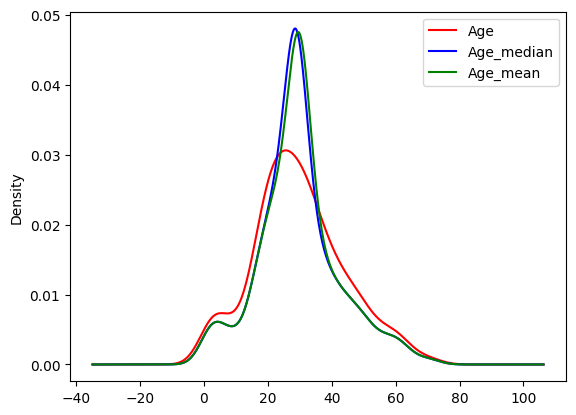

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_train['Age'].plot(kind='kde',ax=ax,color='red')
x_train['Age_median'].plot(kind='kde',ax=ax,color='blue')
x_train['Age_mean'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


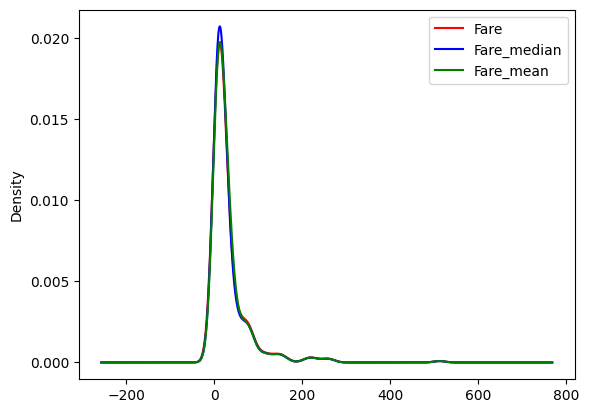

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_train['Fare'].plot(kind='kde',ax=ax,color='red')
x_train['Fare_median'].plot(kind='kde',ax=ax,color='blue')
x_train['Fare_mean'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
